In [1]:
import numpy as np
import matplotlib.pyplot as plt

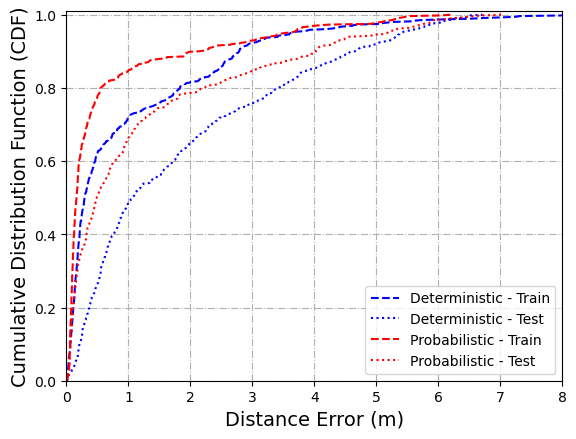

In [56]:
# log = '251225_233626'
# log = '251230_190108'
log = '251225_191020'
fig, ax = plt.subplots()
color = ['b', 'r']
line = ['--', ':']
model = ['Deterministic', 'Probabilistic']
for logi, log in enumerate(['251225_191020', '251230_190108']):
    for seti, set in enumerate(['train', 'test']):
        radar_x = np.load(f'visualize_noeval/{log}/200/radar_x_{set}_0.npy')
        radar_y = np.load(f'visualize_noeval/{log}/200/radar_y_{set}_0.npy')
        lidar_x = np.load(f'visualize_noeval/{log}/200/lidar_x_{set}_0.npy')
        lidar_y = np.load(f'visualize_noeval/{log}/200/lidar_y_{set}_0.npy')


        # ax.plot(radar_x, radar_y)
        ax.plot(lidar_x, lidar_y, label=f'{model[logi]} - T{set[1:]}', c=color[logi], linestyle=line[seti])
        ax.set_ylim([0, 1.01])
        ax.set_xlim([0, 8])
        ax.grid(True, linestyle='-.')

ax.set_xlabel("Distance Error ({})".format('m'), fontsize=14)
ax.set_ylabel("Cumulative Distribution Function (CDF)", fontsize=14)
ax.legend()
plt.savefig('test.svg')

In [9]:
from visualize_unet_points import plot_mapping_error_cdf
import os

log = '251225_191020'
set='train'
log = '251225_191020'
fig1, ax1 = plt.subplots()
color = ['b', 'r']
line = ['--', ':']
model = ['Deterministic', 'Probabilistic']
for logi, log in enumerate(['251225_191020', '251230_190108']):
    for seti, set in enumerate(['train', 'test']):
        rdr_err_all = np.load(f'visualize_noeval/{log}/200/{set}_radar_error_all.npy')
        ldr_err_all = np.load(f'visualize_noeval/{log}/200/{set}_lidar_error_all.npy')
        
        _, _, (radar_x, radar_y), (lidar_x, lidar_y) = plot_mapping_error_cdf(radar_dists=np.stack(rdr_err_all).reshape(-1), 
                       lidar_dists=np.stack(ldr_err_all).reshape(-1), 
                       unit='m', 
                       save_path=None)


        # ax.plot(radar_x, radar_y)
        ax1.plot(lidar_x, lidar_y, label=f'{model[logi]} - T{set[1:]}', c=color[logi], linestyle=line[seti])
        ax1.set_ylim([0, 1.01])
        ax1.set_xlim([0, 8])
        ax1.grid(True, linestyle='-.')

ax1.set_xlabel("Distance Error ({})".format('m'), fontsize=14)
ax1.set_ylabel("Cumulative Distribution Function (CDF)", fontsize=14)
ax1.legend()
fig1.savefig('test.svg')
# plt.show()